# 2022-01-08 • 1000-to-1

In [2]:
include("nb_init.jl");

using Revise
using Distributions, PyFormattedStrings, PartialFunctions, FilePaths, LaTeXStrings
using Unitful: mV, Hz, ms, s, minute
import PyPlot as plt
using VoltageToMap


In [6]:
save = savefig $ (; subdir="methods");

## Generate spikes

We want Poisson firing, i.e. ISIs with an exponential distribution.  
Firing rates lognormally distributed (instead of all the same, as before).

In [21]:
"""
`μ` and `σ` are mean and standard deviation of the underlying Gaussian.
`mean` is the mean of the log of the Gaussian.
"""
function LogNormal_with_mean(mean, σ)
    μ = log(mean) - σ^2 / 2
    LogNormal(μ, σ)
end;

In [22]:
# Mean and variance from Roxin2011 (cross checked with its refs Hromádka, O'Connor).

input_spike_rate = LogNormal_with_mean(4, √(1.04))  # both in Hz

LogNormal{Float64}(μ=0.8662943611198906, σ=1.019803902718557)

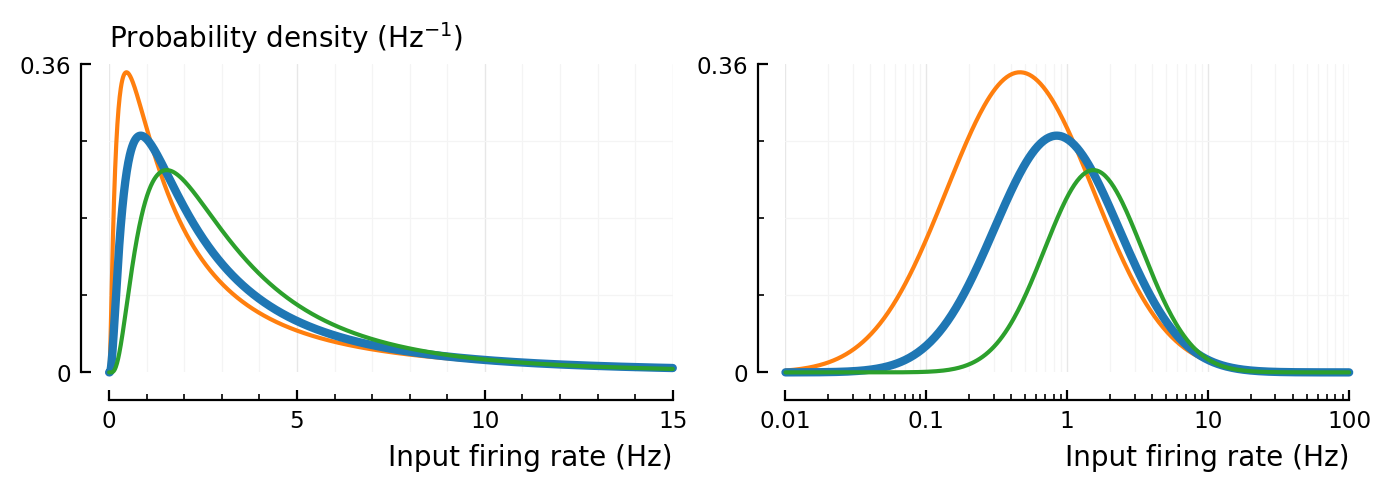

In [114]:
y = pdf.(input_spike_rate, r)
xlabel = "Input firing rate (Hz)"
title = L"Probability density (Hz$^{-1}$)"
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 2))

rlin = 0:0.01:15
rlog = exp10.(-2:0.01:2)
function plot_fr_dist(dist; kw...)
    f = pdf $ dist
    plot(ax1, rlin, f.(rlin); kw...)
    plot(ax2, rlog, f.(rlog); kw...)
end

plot_fr_dist(LogNormal_with_mean(4, 1.2), c="C1")
plot_fr_dist(input_spike_rate, c="C0", lw=3)
plot_fr_dist(LogNormal_with_mean(4, 0.8), c="C2")

set!(ax1; xlabel, title, yrange=true)
set!(ax2; xlabel, xscale="log", yrange=true)

save("lognormal.pdf")

They have the same mean. Reason is that the early risers also have heavier tails (even though you can't see it here).

In [13]:
N_exc    = 1600
N_inh    = 400
N_unconn = 100;

In [15]:
rand(input_spike_rate, N_exc) * Hz

1600-element Vector{Quantity(::Float64, Hz)}:
 16.4556
  2.60648
  3.56875
  0.630405
  1.22391
  6.15155
  3.06953
  2.99087
 13.1986
  3.14414
  7.23793
  0.769781
  8.0625
  ⋮
  3.70756
 12.1827
  1.04566
  1.38693
  3.17547
  1.30728
  2.50872
  1.99406
 10.8817
  2.53647
  2.76723
  2.13346